In [29]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# preprocessing
import re
import string
import itertools # for flattening
# nltk library
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer as wn
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.util import ngrams
nltk.download('punkt', quiet=True)
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin, BaseEstimator
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /Users/Shen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/Shen/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Shen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Shen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [259]:
data=pd.read_pickle('cleanedfile_dicejob.pickle')

In [260]:
data.head()

,advertiserurl,company,employmenttype_jobstatus,jd_old,jobid,joblocation_address,jobtitle,postdate,shift,skills,uniq_id,jobdescription,cleaned_jd,cleanedjd,bigramtexts,trigramtexts,joined_bigram,joined_trigram
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4,SEE BELOW Looking for Selenium engineers...mus...,look selenium engineer solid java cod skill se...,"[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...",look selenium engineer solid java cod skill se...,look selenium engineer solid java cod skill se...
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9,"linux/unix, network monitoring, incident respo...",network monitor incident response system admin...,"[network, monitor, incident, response, system,...","[network, monitor, incident_response, system, ...","[network, monitor, incident_response, system, ...",network monitor incident_response system admin...,network monitor incident_response system admin...
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72,"Enterprise Solutions Architecture, business in...",enterprise solution architecture business inte...,"[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...",enterprise solution architecture business inte...,enterprise solution architecture business inte...
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,3941b2f206ae0f900c4fba4ac0b18719,Please see job description Java DeveloperFull-...,java il client lead edge software development ...,"[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...",java il client lead edge software development ...,java il client lead edge software development ...
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7,"Configuration Management, Developer, Linux, Ma...",configuration management developer linux manag...,"[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...",configuration management developer linux manag...,configuration management developer linux manag...


In [261]:
data.shape

(21542, 18)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21542 entries, 0 to 21999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             21542 non-null  object
 1   company                   21542 non-null  object
 2   employmenttype_jobstatus  21542 non-null  object
 3   jd_old                    21542 non-null  object
 4   jobid                     21542 non-null  object
 5   joblocation_address       21542 non-null  object
 6   jobtitle                  21542 non-null  object
 7   postdate                  21542 non-null  object
 8   shift                     21542 non-null  object
 9   skills                    21542 non-null  object
 10  uniq_id                   21542 non-null  object
 11  jobdescription            21542 non-null  object
 12  cleaned_jd                21542 non-null  object
 13  cleanedjd                 21542 non-null  object
 14  bigramtexts           

In [264]:
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet

## New cols created for jobdescription

In [270]:
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = " ".join([wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None])
        return txt_norm


In [271]:
data['cleaned_jd'] = data['jobdescription'].apply(process_text, args = [4])


In [272]:
data['cleaned_jobtitle'] = data['jobtitle'].apply(process_text, args = [4])


In [273]:
data['cleaed_skills'] = data['skills'].apply(process_text, args = [4])


## EDA

In [274]:
def process_text(text, min_length):
    
    # get common stop words that we'll remove during tokenization/text normalization
    stop_words = stopwords.words('english')

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
   

    # lower case everything
    txt_lower = text.lower()

    #remove mentions, hashtags, and urls, strip whitspace and breaks
    txt_lower = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "", txt_lower).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    
    #remove words with short length
    
    # remove stop words and punctuations 
    txt_norm = [x for x in word_tokenize(txt_lower) if ((x.isalpha()) & (x not in stop_words)) & (x not in ['good','great','found','company','lot','experience','fit','candidate','applicant','requirement','qualification','Deloitte','professional','year','application','opportunity','description','work','role','need','email','delivery',"req_id","job_req","req","id","please","resume","position","forward","receive","contact","minimum","required","disability","eligibility","employment","team","click"])]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    txt_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(txt_norm))) 

    # now we are going to have a cutoff here. any tokenized cocument with length < min length will be removed from corpus
    if len(txt_tagged) <= min_length:
        return ''
    else:
         # rejoins lemmatized sentence 
        txt_norm = [wnl.lemmatize(x[0], x[1]) for x in txt_tagged if x[1] is not None]
        return txt_norm


In [275]:
data['eda_jd'] = data['jobdescription'].apply(process_text, args = [4])


In [276]:
data['eda_jobtitle'] = data['jobtitle'].apply(process_text, args = [4])


In [277]:
data['eda_skills'] = data['skills'].apply(process_text, args = [4])


#### JOB LOCATION GRAPH

In [278]:
data.joblocation_address

0                          Atlanta, GA
1                          Chicago, IL
2                       Schaumburg, IL
3                      Bolingbrook, IL
4                          Atlanta, GA
5                          Chicago, IL
6                          Atlanta, GA
7                          Chicago, IL
8                         New York, NY
9                          Seattle, WA
10                       Sunnyvale, CA
11                 Highlands Ranch, CO
12                        Portland, OR
13                     Los Angeles, CA
14                       Hillsboro, OR
15                       Las Vegas, NV
16                         Atlanta, GA
17                       Beaverton, OR
18                     Kansas City, MO
19                          Denver, CO
20                   Sandy Springs, GA
21                         Chicago, IL
22                      Parsippany, NJ
23                    Eden Prairie, MN
24                          Austin, TX
25                       

In [279]:
data.joblocation_address=data.joblocation_address.str.strip(' ')

In [280]:
location = data.joblocation_address.str.split(", ", expand=True)

In [281]:
location=location.rename(columns={0:'city',1:'state'})

In [282]:
location.state=location.state.str.upper()

In [283]:
location.state.unique()

array(['GA', 'IL', 'NY', 'WA', 'CA', 'CO', 'OR', 'NV', 'MO', 'NJ', 'MN',
       'TX', 'UT', 'SC', 'PA', 'FL', 'AZ', 'VA', 'KS', 'QC', 'MD', 'DC',
       'TN', 'MA', 'MI', 'WI', None, 'NC', 'OH', 'OK', 'AL', 'DE', 'RI',
       'CT', 'ME', 'NH', 'VT', 'KY', 'NE', 'TEXAS', 'IN', 'IA', 'WV',
       'LA', 'SD', 'ID', 'AR', 'ON', 'NM', 'HI', 'AB', 'NS', 'AK', 'BC',
       'MS', 'ND', 'WY', 'WASHINGTON', 'SPRINGS'], dtype=object)

In [284]:
location.state=location.state.apply(lambda x : "TX" if x == "TEXAS" else "DC" if x == "WASHINGTON" else "NY" if x == "SPRINGS" else x)

In [285]:
import seaborn as sns

In [286]:
value_counts_state = location.state.value_counts().sort_values(ascending=False)


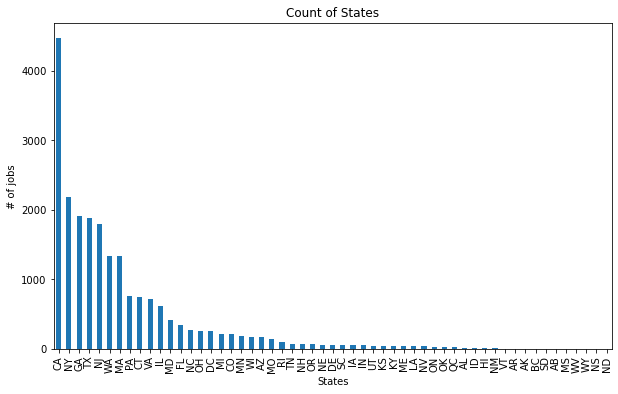

In [287]:


value_counts_state.plot(kind='bar')
plt.title('Count of States')
plt.xlabel('States')
plt.ylabel('# of jobs')

plt.gca().xaxis.set_tick_params(labelsize=10, rotation=90)

fig = plt.gcf()
fig.set_size_inches(10, 6)


plt.show()

#### Job Title WordCloud 

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus_title = data['cleaned_jobtitle']
vectorizer = TfidfVectorizer()
X_title_train = vectorizer.fit_transform(corpus_title)
X_title_train

<21542x2455 sparse matrix of type '<class 'numpy.float64'>'
	with 21951 stored elements in Compressed Sparse Row format>

In [289]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

title_topic_model = NMF(n_components = 10)
title_topic_model.fit(X_title_train)

NMF(n_components=10)

In [290]:
H = title_topic_model.transform(X_title_train) # transform document into topic vector representation

# to get W 
W = title_topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_title_train is " + str(X_title_train.shape))

Shape of W is (10, 2455)
Shape of H is (21542, 10)
Shape of X_title_train is (21542, 2455)


In [291]:
for index,topic in enumerate(W):
    print(f'THE TOP 5 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['perm', 'technical', 'division', 'director', 'search', 'information', 'recruiter', 'robert', 'half', 'technology']


THE TOP 5 WORDS FOR TOPIC #1
['aws', 'sdet', 'amazon', 'platform', 'network', 'devops', 'test', 'development', 'software', 'engineer']


THE TOP 5 WORDS FOR TOPIC #2
['ui', 'javascript', 'lead', 'front', 'end', 'web', 'stack', 'full', 'java', 'developer']


THE TOP 5 WORDS FOR TOPIC #3
['data', 'sale', 'market', 'financial', 'bi', 'development', 'sql', 'intelligence', 'business', 'analyst']


THE TOP 5 WORDS FOR TOPIC #4
['engineering', 'sr', 'sale', 'service', 'program', 'development', 'product', 'technical', 'project', 'manager']


THE TOP 5 WORDS FOR TOPIC #5
['service', 'server', 'capability', 'contract', 'specialist', 'security', 'sale', 'recruiter', 'web', 'senior']


THE TOP 5 WORDS FOR TOPIC #6
['analytics', 'infrastructure', 'enterprise', 'management', 'lead', 'cloud', 'big', 'solution', 'architect', 'data']


THE TOP 5 WORDS FOR TO

In [292]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 10, figsize=(20, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 15})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=13)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 5
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Top Ten Topics in Job Titles")

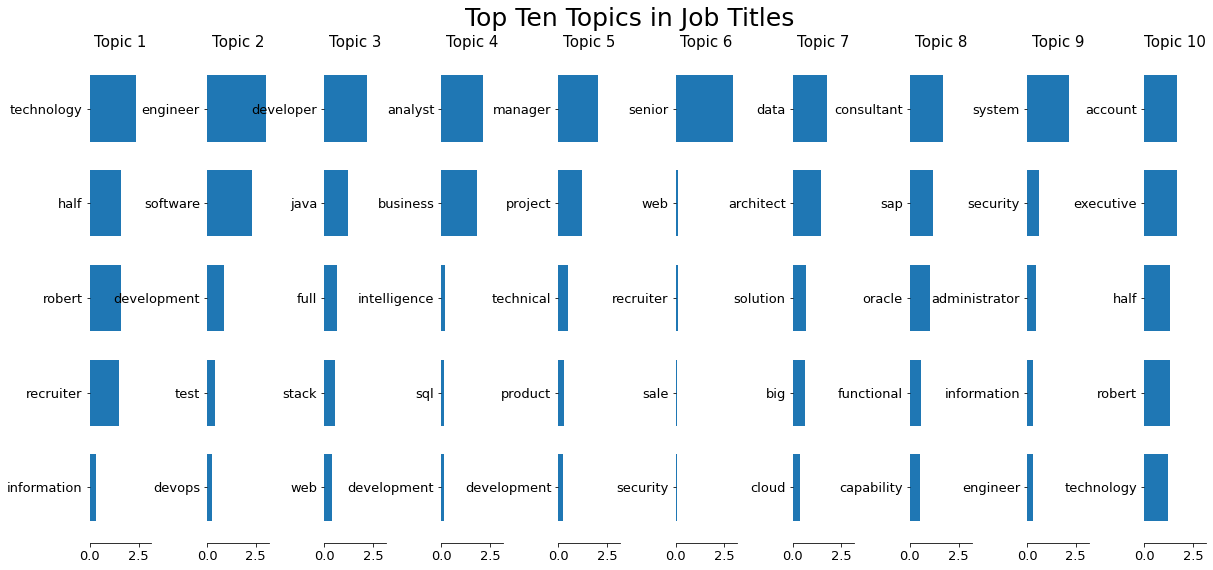

In [293]:
topic_word_plot()

In [294]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [295]:
data.head()

,advertiserurl,company,employmenttype_jobstatus,jd_old,jobid,joblocation_address,jobtitle,postdate,shift,skills,...,cleanedjd,bigramtexts,trigramtexts,joined_bigram,joined_trigram,cleaned_jobtitle,cleaed_skills,eda_jd,eda_jobtitle,eda_skills
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,SEE BELOW,...,"[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...","[look, selenium, engineer, solid, java, cod, s...",look selenium engineer solid java cod skill se...,look selenium engineer solid java cod skill se...,,,"[see, look, selenium, engineer, solid, java, c...",,
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo...",...,"[network, monitor, incident, response, system,...","[network, monitor, incident_response, system, ...","[network, monitor, incident_response, system, ...",network monitor incident_response system admin...,network monitor incident_response system admin...,,network monitor incident response system admin...,"[network, monitor, incident, response, system,...",,"[network, monitor, incident, response, system,..."
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in...",...,"[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...","[enterprise, solution, architecture, business,...",enterprise solution architecture business inte...,enterprise solution architecture business inte...,,enterprise solution architecture business inte...,"[enterprise, solution, architecture, business,...",,"[enterprise, solution, architecture, business,..."
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,Please see job description,...,"[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...","[java, il, client, lead, edge, software, devel...",java il client lead edge software development ...,java il client lead edge software development ...,java developer level culture modern technology...,,"[see, job, java, il, client, lead, edge, softw...","[java, developer, level, culture, modern, tech...",
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma...",...,"[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...","[configuration, management, developer, linux, ...",configuration management developer linux manag...,configuration management developer linux manag...,,configuration management developer linux manag...,"[configuration, management, developer, linux, ...",,"[configuration, management, developer, linux, ..."


In [296]:
jobtitle_wordcloud = WordCloud(width=800, height=800, 
                      min_font_size=10).generate(data['jobtitle'].to_string())

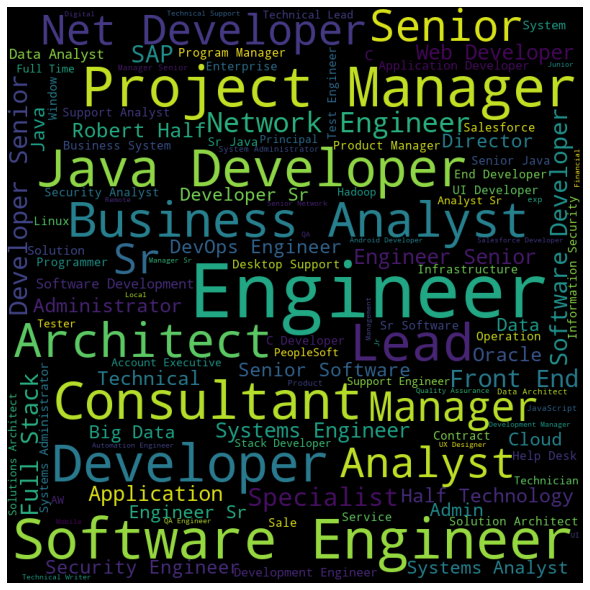

In [297]:
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(jobtitle_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()

In [304]:
wordcloud = WordCloud(width=800, height=800, 
                      min_font_size=10).generate(data['cleaed_skills'].to_string())

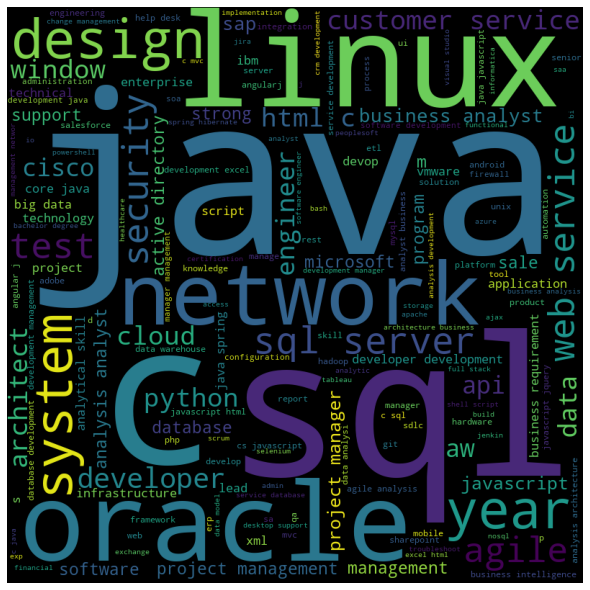

In [305]:
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()

In [300]:
data['jobdescription']=data['jobdescription'].drop_duplicates()

In [301]:
company=data['company'].value_counts()[:21]

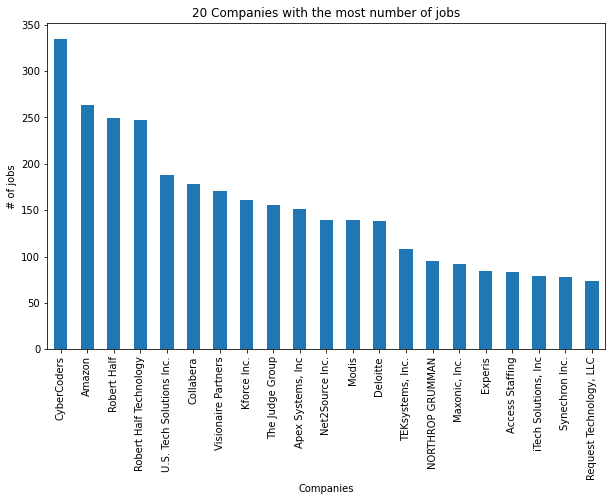

In [302]:
company.plot(kind='bar')
plt.title("20 Companies with the most number of jobs")
plt.xlabel('Companies')
plt.ylabel('# of jobs')

plt.gca().xaxis.set_tick_params(labelsize=10, rotation=90)

fig = plt.gcf()
fig.set_size_inches(10, 6)


plt.show()

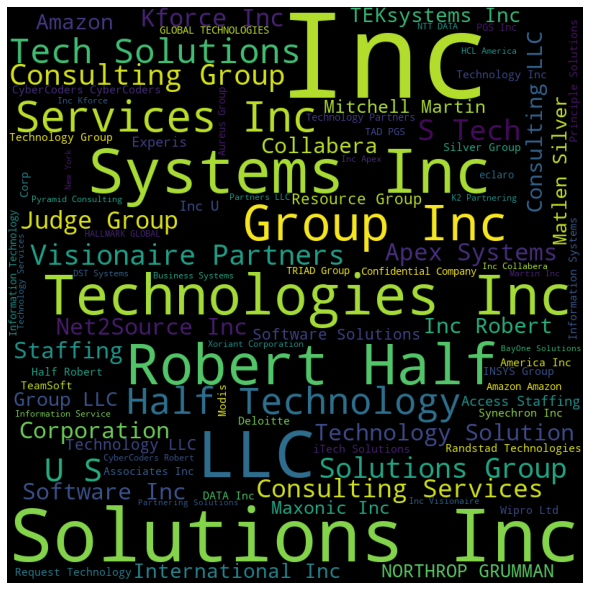

In [303]:
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(company_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()

## Count vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


# Create the count vectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix
matrix = vectorizer.fit_transform(data['cleaned_jd'])

# Get the feature names (the words or n-grams)
feature_names = vectorizer.get_feature_names()

# Convert the matrix to a dense array
array = matrix.toarray()

# Print the feature names and matrix
print("Feature names:", feature_names)
print("Matrix:")
print(array)



Feature names: ['aa', 'aaa', 'aabc', 'aability', 'aac', 'aacc', 'aace', 'aacg', 'aacrao', 'aad', 'aadconnectexperience', 'aadsync', 'aae', 'aaebig', 'aaecognitive', 'aag', 'aakash', 'aamc', 'aami', 'aamir', 'aan', 'aana', 'aap', 'aarnoldi', 'aaron', 'aarti', 'aas', 'aashinder', 'aashish', 'aat', 'aau', 'aavalar', 'aaworking', 'ab', 'aba', 'abac', 'abachelor', 'abacus', 'abailblity', 'abal', 'abandon', 'abandonment', 'abap', 'abaper', 'abapers', 'abapo', 'abaqus', 'abatement', 'abb', 'abbassystemsoft', 'abbott', 'abboud', 'abbreviate', 'abbreviation', 'abc', 'abco', 'abd', 'abdul', 'abe', 'abel', 'abend', 'abendaid', 'abends', 'abercrombie', 'aberdeen', 'aberrant', 'abet', 'abg', 'abgs', 'abgwireless', 'abhay', 'abhayus', 'abhes', 'abhi', 'abhijit', 'abhilash', 'abhimanyu', 'abhinavan', 'abhishek', 'abhra', 'abide', 'abides', 'abiding', 'abiliity', 'abilites', 'abilities', 'abilitiesa', 'abilitiesability', 'abilitiesable', 'abilitiesadditional', 'abilitiesadvanced', 'abilitiesagile', 'a

In [30]:
counttext=pd.DataFrame(data=array,columns=feature_names)

In [31]:
counttext

,aa,aaa,aabc,aability,aac,aacc,aace,aacg,aacrao,aad,...,第十一回,第十回,第四回,羨殺,覽去,訖乃返,貢院,關雎,驚異,ﬁrm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#countvect1=pd.concat([data['jobtitle'],counttext])
#

## TDIDF vectorizer - NLLTP NMF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data['cleaned_jd']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<21542x88084 sparse matrix of type '<class 'numpy.float64'>'
	with 2751714 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

topic_model = NMF(n_components = 10)
topic_model.fit(X_train)

NMF(n_components=10)

In [35]:
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (10, 88084)
Shape of H is (21542, 10)
Shape of X_train is (21542, 88084)


In [36]:
for index,topic in enumerate(W):
    print(f'THE TOP 25 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 25 WORDS FOR TOPIC #0
['support', 'budget', 'scope', 'skill', 'system', 'program', 'stakeholder', 'experience', 'schedule', 'change', 'ensure', 'ability', 'risk', 'work', 'technical', 'resource', 'requirement', 'process', 'team', 'plan', 'manager', 'manage', 'business', 'management', 'project']


THE TOP 25 WORDS FOR TOPIC #1
['jquery', 'server', 'ui', 'code', 'html', 'database', 'oracle', 'develop', 'knowledge', 'spring', 'strong', 'skill', 'sql', 'work', 'use', 'framework', 'javascript', 'year', 'developer', 'design', 'development', 'application', 'java', 'web', 'experience']


THE TOP 25 WORDS FOR TOPIC #2
['technical', 'windows', 'storage', 'maintain', 'vmware', 'switch', 'provide', 'environment', 'microsoft', 'include', 'desktop', 'configuration', 'knowledge', 'administration', 'window', 'service', 'infrastructure', 'experience', 'hardware', 'troubleshoot', 'cisco', 'server', 'system', 'support', 'network']


THE TOP 25 WORDS FOR TOPIC #3
['contract', 'industry', 'skill', 

In [37]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 15
tfidf_feature_names = vectorizer.get_feature_names()
plot_top_words(W, tfidf_feature_names, n_top_words, "Top Five Topics in Employee Reviews")

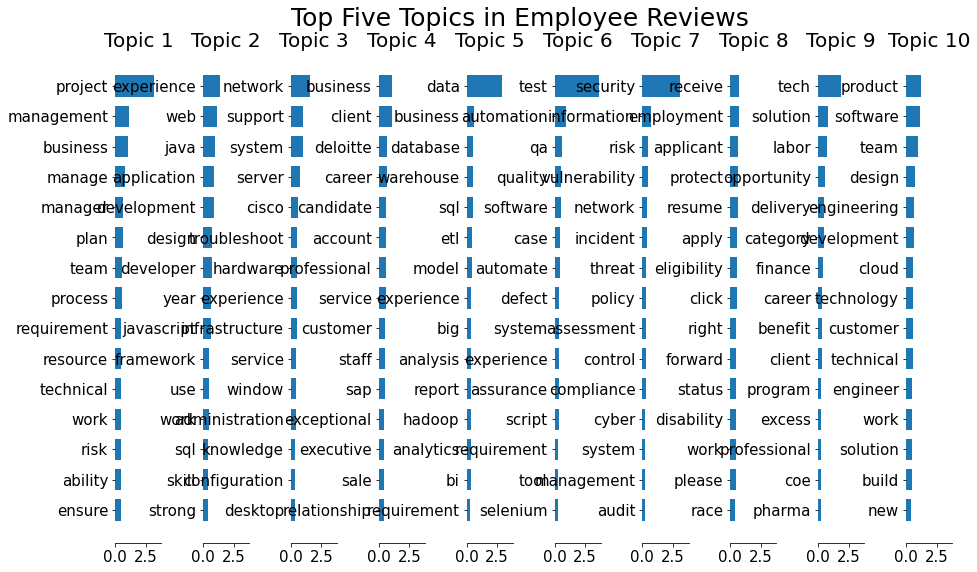

In [38]:
topic_word_plot()